# Problem 8.13

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
X1 = [-0.494, -0.311, 0.0064, -0.0089, 0.0014, -0.189,0.085, 0.171, 0.142]
Y1= [0.363, -0.101, 0.374, -0.173, 0.138, 0.718, 0.32208, -0.302, 0.568]

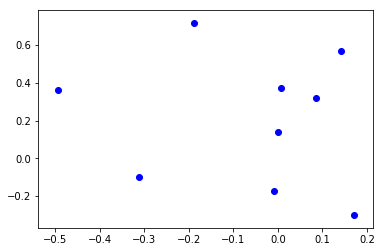

In [3]:
plt.scatter(X1,Y1, color = 'blue', marker = 'o')
plt.show()

In [4]:
X2 = [0.491, -0.892, -0.721, 0.519, -0.775, -0.646,-0.803, 0.994, 0.724, -0.748,-0.635]
Y2 = [0.920, -0.946, -0.710, -0.715, 0.551, 0.773, 0.875, 0.801, -0.795,-0.853, -0.905]

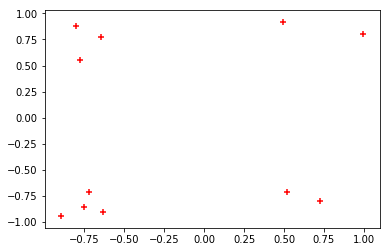

In [5]:
plt.scatter(X2,Y2,color='red', marker = '+')
plt.show()

In [6]:
# data points
data = np.array([[1,-0.494,0.363, 1],
                [1,-0.311,-0.101,1],
                [1,0.0064,0.374,1],
                [1,-0.0089,-0.173,1],
                [1,0.0014,0.138,1],
                [1,-0.189,0.718,1],
                [1,0.085,0.32208,1],
                [1,0.171,-0.302,1],
                [1,0.142,0.568,1],
                [1,0.491,  0.920,-1],
                [1,-0.892, -0.946,-1],
                [1,-0.721, -0.710,-1],
                [1,0.519, -0.715,-1],
                [1,-0.775, 0.551,-1],
                [1,-0.646,0.773,-1],
                [1,-0.803, 0.875,-1],
                [1,0.994, 0.801,-1],
                [1,0.724,-0.795,-1],
                [1,-0.748,-0.853-1],
                [1,-0.635,-0.905,-1]])

In [7]:
x_points = np.array([[1,-0.494,0.363],
[1,-0.311,-0.101],
[1,0.0064,0.374],
[1,-0.0089,-0.173],
[1,0.0014,0.138],
[1,-0.189,0.718],
[1,0.085,0.32208],
[1,0.171,-0.302],
[1,0.142,0.568],
[1,0.491,  0.920],
[1,-0.892, -0.946],
[1,-0.721, -0.710],
[1,0.519, -0.715],
[1,-0.775, 0.551], 
[1,-0.646,0.773], 
[1,-0.803, 0.875], 
[1,0.994, 0.801], 
[1,0.724,-0.795],
[1,-0.748,-0.853],
[1,-0.635,-0.905]])

In [8]:
y_labels = [1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]

In [9]:
w = inv(x_points.T.dot(x_points)).dot(x_points.T).dot(y_labels)
print(w)

[-0.08293153  0.20484254  0.32268424]


# Part A

In [16]:
# number of data points
n = 1000
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)

X, Y = np.meshgrid(x, y)

In [10]:
# feature transformation
def transform(data):
    result = []
    for i in data:
        x1 = i[1]
        x2 = i[2]
        flag = i[-1]
        x = [1, x1, x2, x1**2, x1*x2, x2**2, flag]
        result.append(x)
    return np.array(result)

newdata = transform(data)


def f(x,y,w):
    return w[0] + w[1]*x + w[2]*y + w[3]*x**2 + w[4]*(x*y) + w[5]*(y**2)

In [11]:
# pre-processing data
X_tran = newdata[:,:-1]
Y_tran = newdata[:,-1]

In [12]:
W_2 = inv(X_tran.T.dot(X_tran)).dot(X_tran.T).dot(Y_tran)

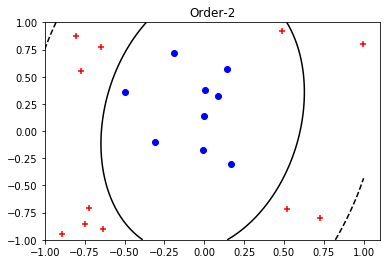

In [18]:
plt.scatter(X1,Y1, color = 'blue', marker = 'o')
plt.scatter(X2,Y2,color='red', marker = '+')
plt.contour(X, Y, f(X, Y,W_2), 1, colors = 'black')
plt.title('Order-2')
plt.show()

In [19]:
# feature transformation
def transform(data):
    result = []
    for i in data:
        x1 = i[1]
        x2 = i[2]
        flag = i[-1]
        x = [1, x1, x2, x1 * x2, x1**2, x2**2, x1**3, (x1**2)*x2, x1*(x2**2), x2**3, flag]
        result.append(x)
    return np.array(result)

newdata = transform(data)


def f(x,y,w):
    return w[0] + w[1]*x + w[2]*y + w[3]*x*y + w[4]*(x**2) + w[5]*(y**2) + w[6]*(x**3) + w[7]*(x**2)*y + w[8]*x*(y**2) + w[9]*y**3

In [20]:
X_tran = newdata[:,:-1]
Y_tran = newdata[:,-1]

In [21]:
W_3 = inv(X_tran.T.dot(X_tran)).dot(X_tran.T).dot(Y_tran)

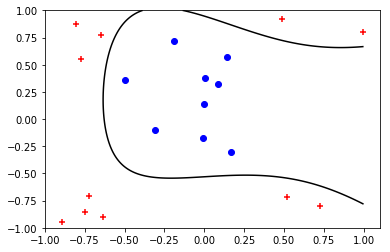

In [23]:
plt.scatter(X1,Y1, color = 'blue', marker = 'o')
plt.scatter(X2,Y2,color='red', marker = '+')
plt.contour(X, Y, f(X, Y, W_3), 1, colors = 'black')
plt.show()

# Part B

Third order fit seems to be overfitted

# Part C

In [24]:
def transform(data):
    result = []
    for i in data:
        x1 = i[1]
        x2 = i[2]
        flag = i[-1]
        x = [1, x1, x2, x1**2, x1*x2, x2**2, flag]
        result.append(x)
    return np.array(result)

newdata_pseudo2 = transform(data)


def f(x,y,w):
    return w[0] + w[1]*x + w[2]*y + w[3]*x**2 + w[4]*(x*y) + w[5]*(y**2)

In [25]:
X_tran = newdata_pseudo2[:,:-1]
Y_tran = newdata_pseudo2[:,-1]

In [26]:
parameter = 1
w_pseudo = inv(X_tran.T.dot(X_tran) + parameter*(X_tran.T.dot(X_tran))).dot(X_tran.T).dot(Y_tran)

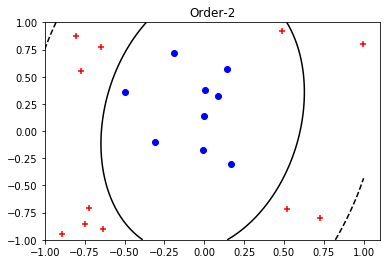

In [27]:
plt.scatter(X1,Y1, color = 'blue', marker = 'o')
plt.scatter(X2,Y2,color='red', marker = '+')
plt.contour(X, Y, f(X, Y,w_pseudo), 1, colors = 'black')
plt.title('Order-2')
plt.show()

In [28]:
def transform(data):
    result = []
    for i in data:
        x1 = i[1]
        x2 = i[2]
        flag = i[-1]
        x = [1, x1, x2, x1 * x2, x1**2, x2**2, x1**3, (x1**2)*x2, x1*(x2**2), x2**3, flag]
        result.append(x)
    return np.array(result)

newdata_pseudo1 = transform(data)


def f(x,y,w):
    return w[0] + w[1]*x + w[2]*y + w[3]*x*y + w[4]*(x**2) + w[5]*(y**2) + w[6]*(x**3) + w[7]*(x**2)*y + w[8]*x*(y**2) + w[9]*y**3

In [29]:
X_tran = newdata_pseudo1[:,:-1]
Y_tran = newdata_pseudo1[:,-1]

In [30]:
parameter = 1
w_pseudo = inv(X_tran.T.dot(X_tran) + parameter*(X_tran.T.dot(X_tran))).dot(X_tran.T).dot(Y_tran)

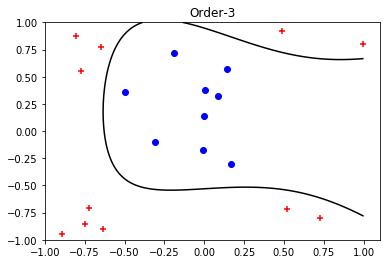

In [31]:
plt.scatter(X1,Y1, color = 'blue', marker = 'o')
plt.scatter(X2,Y2,color='red', marker = '+')
plt.contour(X, Y, f(X, Y,w_pseudo), 1, colors = 'black')
plt.title('Order-3')
plt.show()

# Part D

In [32]:
from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(x_points, y_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

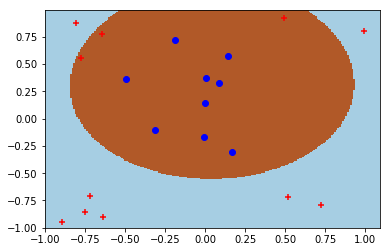

In [33]:
h = .01

xx, yy = np.meshgrid(
    np.arange(-1, 1.1, h),
    np.arange(-1, 1, h),
)
Z = np.zeros_like(xx)

#Result into a color plot
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        xx[i]
        Z[i, j] = svclassifier.predict(np.array([1, xx[i, j], yy[i, j]]).reshape(1, -1))
        
plt.pcolormesh(xx, yy, Z, cmap= plt.cm.Paired)

plt.scatter(X1,Y1, color = 'blue', marker = 'o')
plt.scatter(X2,Y2,color='red', marker = '+')
plt.show()

In [34]:
score = svclassifier.score(x_points, y_labels) * 100
print("Percentage Score using SVM: ", score)

Percentage Score using SVM:  85.0


SVM plot depicts that it is a competitive non-linear classifier just like second-order polynomial fit in part A. It can also be concluded from the plot that there's no significant overfitting similar to what is observed in part A, second order fit.

In [35]:
svclassifier = SVC(kernel='poly', degree = 2)